In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from scipy.stats import pearsonr
%matplotlib inline

In [2]:
movie_dates_df = pd.read_csv('E:\movie_release_dates.csv', index_col=0)
theaters_df = pd.read_csv('E:\movie_theater_data.csv', index_col=0)
awards_df = pd.read_csv('E:\movie_awards.csv', index_col=0)
actors_df = pd.read_csv('E:\Actors_Table.csv')
directors_df = pd.read_csv('E:\Directors_Table.csv')
imdb_base_df = pd.read_csv('E:\IMDb_base.csv')
imdb_budgets_df = pd.read_csv('E:\IMDb_budgets.csv')
studio_df = pd.read_csv('E:\studiodf.csv')

In [3]:
imdb_budgets_df = imdb_budgets_df[imdb_budgets_df['Domestic Gross'] !=0]

In [4]:
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564
1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337
2,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376
3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754
4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395


In [5]:
movie_dates_df.head()

,movie,release_date,release_month,release_day,release_year
0,Metropolis,1927-03-06,March,Sunday,1927
1,"Dr. Mabuse, the Gambler",1927-08-08,August,Monday,1927
2,The Unknown,1927-06-03,June,Friday,1927
3,The Jazz Singer,1927-10-06,October,Thursday,1927
4,Chicago,1927-12-23,December,Friday,1927


In [6]:
theaters_df.head()

,title,max_theaters,year,total_dom_gross($),studio
0,The Lion King,4802,2019,543638043,Disney
1,Avengers: Endgame,4662,2019,858373000,Disney
2,Spider-Man: Far from Home,4634,2019,390532085,Sony
3,Toy Story 4,4575,2019,434038008,Disney
4,It Chapter Two,4570,2019,211593228,Warner Bros.


In [7]:
actors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Robert Downey Jr.,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Chris Evans,"Apr 23, 2019",400000000,858373000,2797800564
2,Avengers: Endgame,2019,Mark Ruffalo,"Apr 23, 2019",400000000,858373000,2797800564
3,Avengers: Endgame,2019,Chris Hemsworth,"Apr 23, 2019",400000000,858373000,2797800564
4,Avatar,2009,Sam Worthington,"Dec 17, 2009",237000000,760507625,2788701337


In [8]:
directors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Joe Russo,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Anthony Russo,"Apr 23, 2019",400000000,858373000,2797800564
2,Avatar,2009,James Cameron,"Dec 17, 2009",237000000,760507625,2788701337
3,Black Panther,2018,Ryan Coogler,"Feb 13, 2018",200000000,700059566,1346103376
4,Avengers: Infinity War,2018,Joe Russo,"Apr 25, 2018",300000000,678815482,2048359754


In [9]:
imdb_base_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre
0,Star Wars: Episode VII - The Force Awakens,2015,7.9,PG-13,138,"Action, Adventure, Sci-Fi"
1,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama"
2,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy"
3,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi"
4,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi"


In [10]:
studio_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,Buena Vista,415000000.0,652000000,2010
1,Alice in Wonderland (2010),Buena Vista,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,Pixar/Dreamworks,238700000.0,513900000,2010


# Question 1: What are the most profitable movies and how much should you spend?


In [11]:
imdb_budgets_df['Profit'] = imdb_budgets_df['Worldwide Gross'] - imdb_budgets_df['Production Budget']

imdb_budgets_df['Profit_Margin'] = (imdb_budgets_df['Worldwide Gross'] - 
                                    imdb_budgets_df['Production Budget'])/imdb_budgets_df['Worldwide Gross']

In [12]:
imdb_budgets_df['Adjusted_Budget'] = ((((2020-imdb_budgets_df['Year'])*.0322)+1)*
                                      imdb_budgets_df['Production Budget'])
imdb_budgets_df['Adjusted_Profit'] = (((2020-imdb_budgets_df['Year'])*.0322)+1)*imdb_budgets_df['Profit']
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.857031,412880000.0,2.475010e+09
1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.915014,320945400.0,3.455514e+09
2,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376,1146103376,0.851423,212880000.0,1.219912e+09
3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.853541,319320000.0,1.860954e+09
4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.909429,348120000.0,3.495488e+09


In [13]:
profitable_movies_df = imdb_budgets_df.loc[imdb_budgets_df['Profit'] > 0]
profitable_ranked_df = profitable_movies_df.sort_values(by=['Adjusted_Profit'], ascending=False)
profitable_ranked_df.reset_index(inplace=True)
profitable_ranked_df.head()

,index,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.909429,348120000.0,3.495488e+09
1,1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.915014,320945400.0,3.455514e+09
2,0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.857031,412880000.0,2.475010e+09
3,3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.853541,319320000.0,1.860954e+09
4,28,Jurassic Park,1993,8.1,PG-13,127,"Action, Adventure, Sci-Fi","Jun 11, 1993",63000000,402523348,1045627627,982627627,0.939749,117772200.0,1.836924e+09


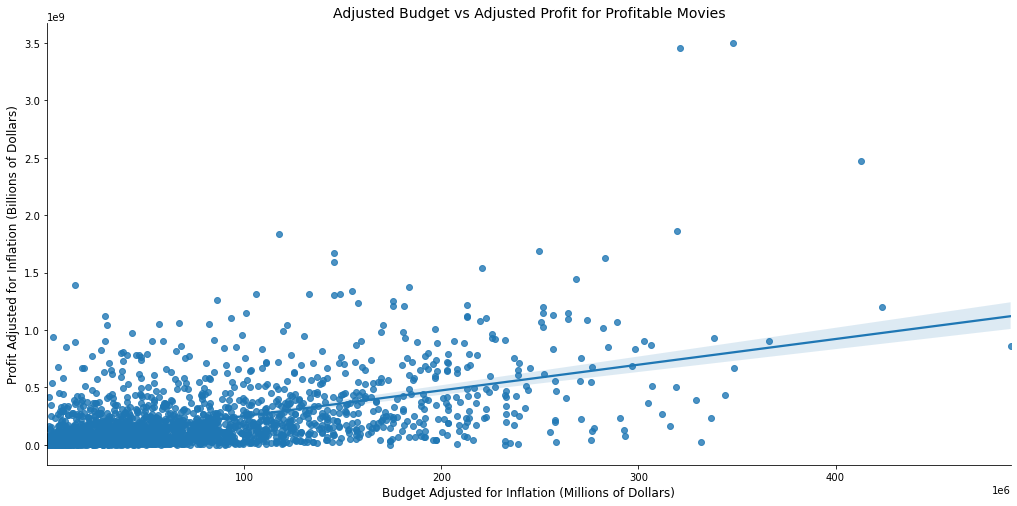

In [14]:
ax1 = sns.lmplot(x='Adjusted_Budget', y='Adjusted_Profit', data=profitable_ranked_df, height=7, aspect=2)
plt.xlabel('Budget Adjusted for Inflation (Millions of Dollars)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Adjusted for Inflation (Billions of Dollars)', fontsize=12)
plt.title('Adjusted Budget vs Adjusted Profit for Profitable Movies', fontsize=14)
plt.savefig('BudgetVProfit');

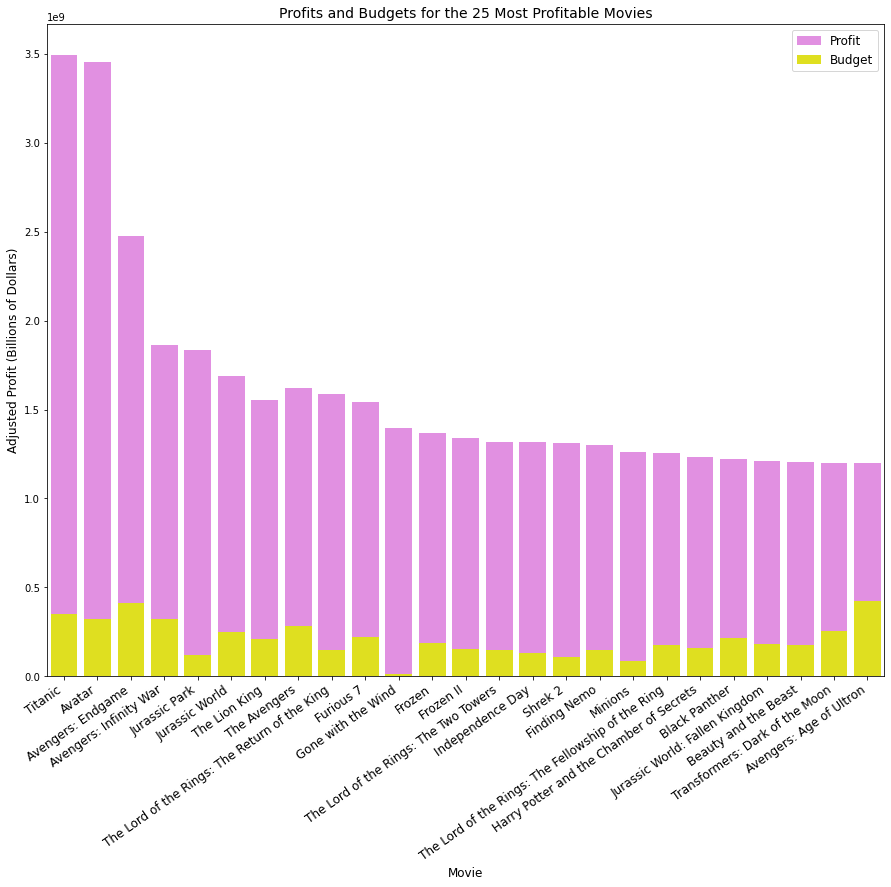

In [15]:
plt.figure(figsize=(15,12))
sns.barplot(x=profitable_ranked_df.loc[0:25, 'Movie'],y=profitable_ranked_df.loc[0:25, 'Adjusted_Profit'], 
            color='VIOLET', label='Profit', ci=None)
sns.barplot(x=profitable_ranked_df.loc[0:25, 'Movie'],y=profitable_ranked_df.loc[0:25, 'Adjusted_Budget'], 
            color='yellow', label='Budget', ci=None)
plt.xlabel('Movie', fontsize=12)
plt.title("Profits and Budgets for the 25 Most Profitable Movies", fontsize=14)
plt.ylabel('Adjusted Profit (Billions of Dollars)', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('ProfitBudgetTop25');

In [16]:
profitable_movies_df['Adjusted_Budget'].describe()

count    2.836000e+03
mean     6.068914e+07
std      6.319946e+07
min      1.060640e+04
25%      1.660885e+07
50%      3.868410e+07
75%      8.224715e+07
max      4.888342e+08
Name: Adjusted_Budget, dtype: float64

In [17]:
profitable_movies_df.loc[0:24, 'Adjusted_Budget'].describe()

count    2.500000e+01
mean     2.427778e+08
std      8.069887e+07
min      1.060640e+08
25%      1.806350e+08
50%      2.257600e+08
75%      2.829600e+08
max      4.237650e+08
Name: Adjusted_Budget, dtype: float64

In [18]:
profitable_movies_df['Profit_Margin'].describe()

count    2836.000000
mean        0.621489
std         0.240466
min         0.000265
25%         0.465466
50%         0.671426
75%         0.809796
max         0.997599
Name: Profit_Margin, dtype: float64

In [19]:
profitable_movies_df.loc[0:24, 'Profit_Margin'].describe()

count    25.000000
mean      0.846165
std       0.046107
min       0.738557
25%       0.813675
50%       0.849688
75%       0.871288
max       0.925154
Name: Profit_Margin, dtype: float64

In [20]:
len(profitable_ranked_df.loc[profitable_ranked_df['Profit_Margin'] > 0.5])

2041

In [21]:
filtered_df = profitable_ranked_df.loc[(profitable_ranked_df['Profit_Margin'] >= 0.75) & 
                         (profitable_ranked_df['Adjusted_Budget'] > 38676000)]
len(filtered_df)

374

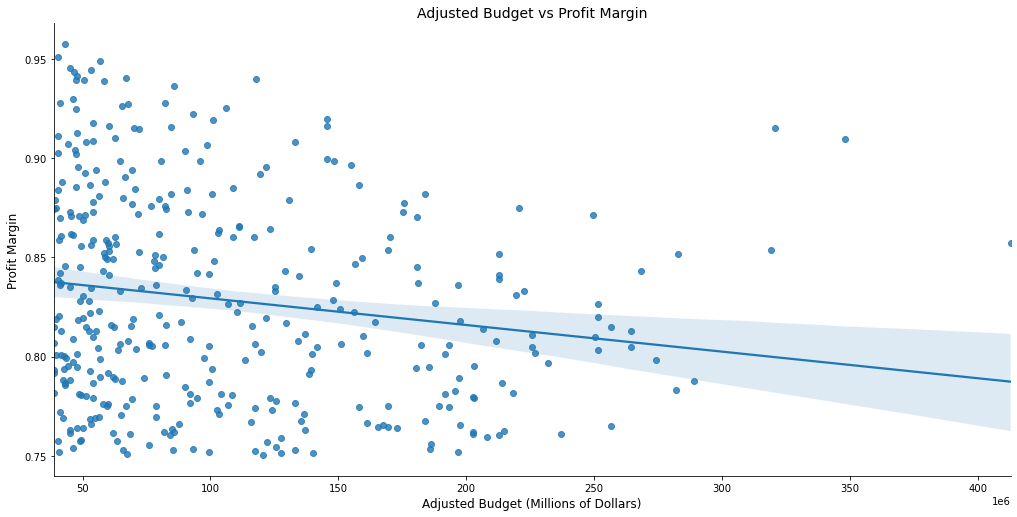

In [22]:
ax2 = sns.lmplot(x='Adjusted_Budget', y='Profit_Margin', data=filtered_df, height=7, aspect=2)
plt.xlabel('Adjusted Budget (Millions of Dollars)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Adjusted Budget vs Profit Margin', fontsize=14)
plt.savefig('BudgetVMargin');

In [23]:
filtered_df.describe()

,index,Year,IMDb,Runtime,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
count,374.000000,374.000000,374.000000,374.000000,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,374.000000,3.740000e+02,3.740000e+02
mean,391.529412,2004.965241,7.012032,118.601604,7.781418e+07,1.933788e+08,4.849949e+08,4.071807e+08,0.828523,1.058585e+08,5.628791e+08
std,378.199265,10.811640,0.902894,24.020748,5.757015e+07,1.270890e+08,3.776903e+08,3.299941e+08,0.052470,6.627224e+07,4.131143e+08
min,0.000000,1956.000000,3.300000,79.000000,1.350000e+07,1.901988e+07,6.999538e+07,5.499538e+07,0.750282,3.868500e+07,1.232098e+08
25%,111.250000,1998.000000,6.400000,100.000000,3.500000e+07,1.069483e+08,2.172884e+08,1.763544e+08,0.783548,5.347110e+07,2.748616e+08
50%,279.500000,2007.000000,7.000000,116.000000,5.500000e+07,1.628020e+08,3.509376e+08,2.990630e+08,0.819296,8.224930e+07,4.492299e+08
75%,550.500000,2014.000000,7.700000,131.750000,1.000000e+08,2.420814e+08,6.360843e+08,5.139793e+08,0.869551,1.396546e+08,7.195911e+08
max,2424.000000,2020.000000,9.000000,228.000000,4.000000e+08,8.583730e+08,2.797801e+09,2.551701e+09,0.957496,4.128800e+08,3.495488e+09


# Question 2: Which movie genres are most commonly produced and does quantity equate to higher net profits?

In [24]:
imdb_budgets_df['Genre'] = imdb_budgets_df['Genre'].str.split(', ')
imdb_budgets_df1 = imdb_budgets_df['Genre'].apply(pd.Series)
imdb_budgets_df2 = pd.merge(imdb_budgets_df, imdb_budgets_df1, right_index = True, left_index = True)
imdb_budgets_df3 = imdb_budgets_df2.drop(['Genre'], axis = 1)
genre_budgets_df = imdb_budgets_df3.melt(id_vars=['Movie', 'Year'], value_vars=[0, 1, 2] ,var_name = ['X'])
genre_budgets_df = pd.merge(genre_budgets_df, imdb_budgets_df)
genre_budgets_df = genre_budgets_df.drop(['Genre', 'X'], axis=1)
genre_budgets_df = genre_budgets_df.drop_duplicates()
genre_budgets_df = genre_budgets_df.rename(columns={'value': 'Genre'})
genre_budgets_df = genre_budgets_df.dropna()

In [25]:
m_by_genre = genre_budgets_df.groupby('Genre', as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)

In [26]:
m_by_genre

,Genre,Movie
6,Drama,1876
4,Comedy,1444
0,Action,1045
1,Adventure,834
5,Crime,689
15,Romance,622
18,Thriller,615
11,Horror,410
14,Mystery,356
16,Sci-Fi,330


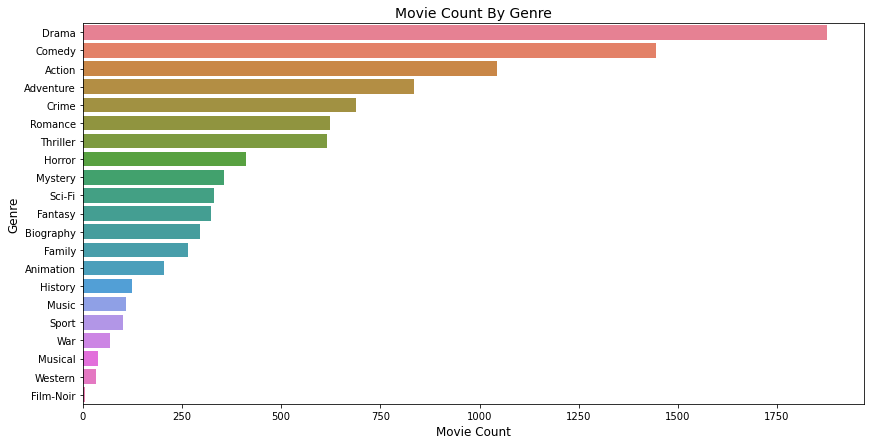

In [27]:
plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=m_by_genre['Movie'], y=m_by_genre['Genre'], palette='husl')
plt.xlabel('Movie Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Movie Count By Genre', fontsize=14)
plt.savefig('CountGenre');

In [28]:
p_by_genre = genre_budgets_df.groupby('Genre', as_index=False)[['Adjusted_Profit', 'Profit_Margin']].median().sort_values(by='Adjusted_Profit', ascending=False)

In [29]:
p_by_genre

,Genre,Adjusted_Profit,Profit_Margin
2,Animation,2.036066e+08,0.681316
1,Adventure,1.237950e+08,0.610306
16,Sci-Fi,7.619912e+07,0.596241
7,Family,7.462154e+07,0.582691
0,Action,6.433253e+07,0.519977
8,Fantasy,5.405758e+07,0.542261
18,Thriller,4.733895e+07,0.595092
13,Musical,4.663190e+07,0.652690
14,Mystery,3.963432e+07,0.614036
11,Horror,3.896335e+07,0.670497


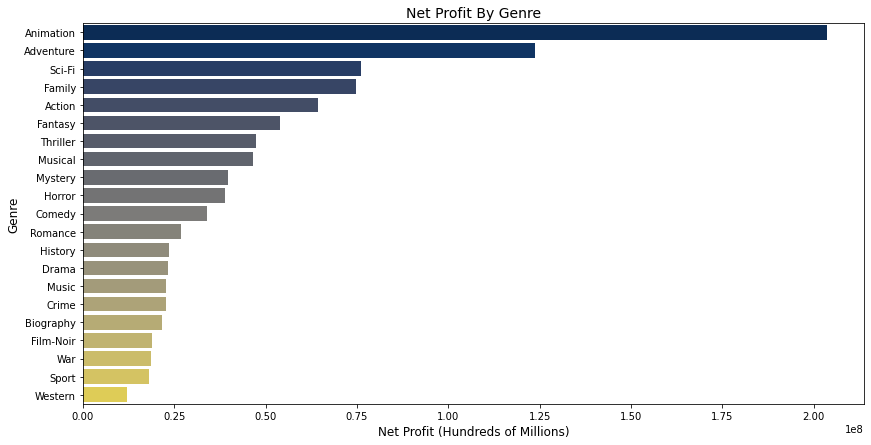

In [30]:
plt.figure(figsize=(14,7))
ax4 = sns.barplot(x=p_by_genre['Adjusted_Profit'], y=p_by_genre['Genre'], palette='cividis')
plt.xlabel('Net Profit (Hundreds of Millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Net Profit By Genre', fontsize=14)
plt.savefig('NetProfitGenre');

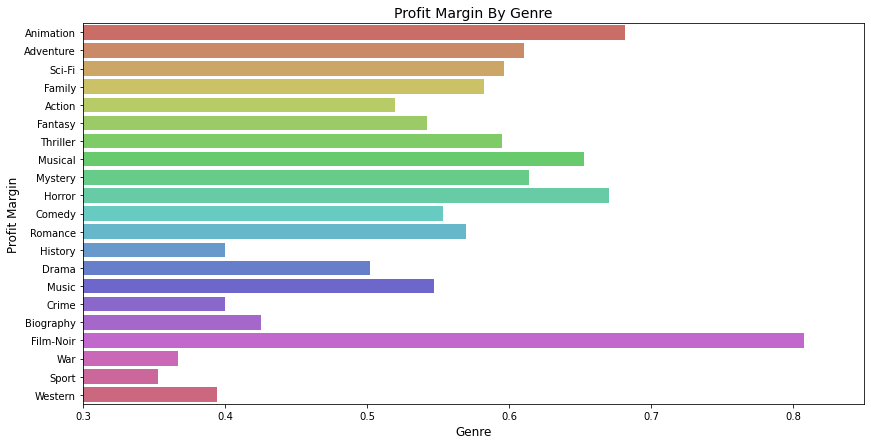

In [31]:
plt.figure(figsize=(14,7))
ax5 = sns.barplot(x=p_by_genre['Profit_Margin'], y=p_by_genre['Genre'], palette='hls')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Profit Margin By Genre', fontsize=14)
plt.xlim(0.3, 0.85)
plt.savefig('ProfitMarginGenre');

In [32]:
per_by_genre = genre_budgets_df.groupby(['Genre'],  as_index=False)['Adjusted_Profit'].sum().sort_values(by='Adjusted_Profit', ascending=False)
per_by_genre['Percent Total of Net Profit'] = (per_by_genre['Adjusted_Profit']/per_by_genre['Adjusted_Profit'].sum()*100).round(2)
per_by_genre

,Genre,Adjusted_Profit,Percent Total of Net Profit
1,Adventure,2.173357e+11,18.07
0,Action,1.789300e+11,14.88
4,Comedy,1.519229e+11,12.63
6,Drama,1.449900e+11,12.05
16,Sci-Fi,7.046561e+10,5.86
2,Animation,6.872099e+10,5.71
18,Thriller,6.544224e+10,5.44
8,Fantasy,5.479714e+10,4.56
15,Romance,5.051074e+10,4.20
7,Family,4.604064e+10,3.83


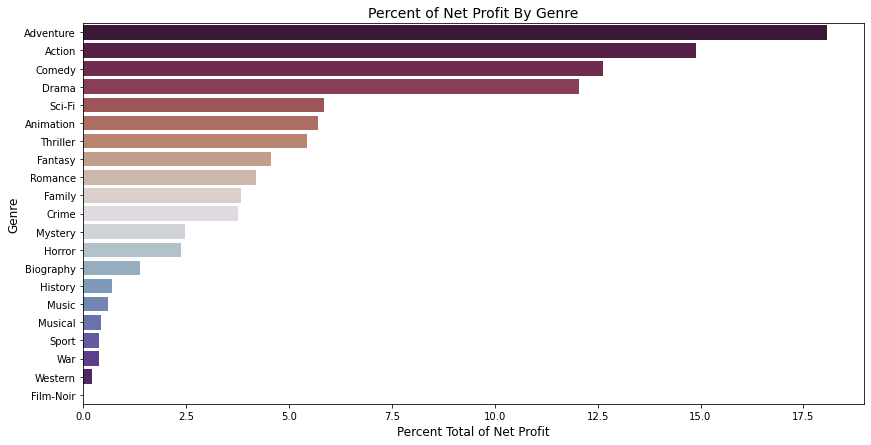

In [33]:
plt.figure(figsize=(14,7))
ax6 = sns.barplot(x=per_by_genre['Percent Total of Net Profit'], y=per_by_genre['Genre'], palette='twilight_shifted_r')
plt.xlabel('Percent Total of Net Profit', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Percent of Net Profit By Genre', fontsize=14)
plt.savefig('PercentProfitGenre');

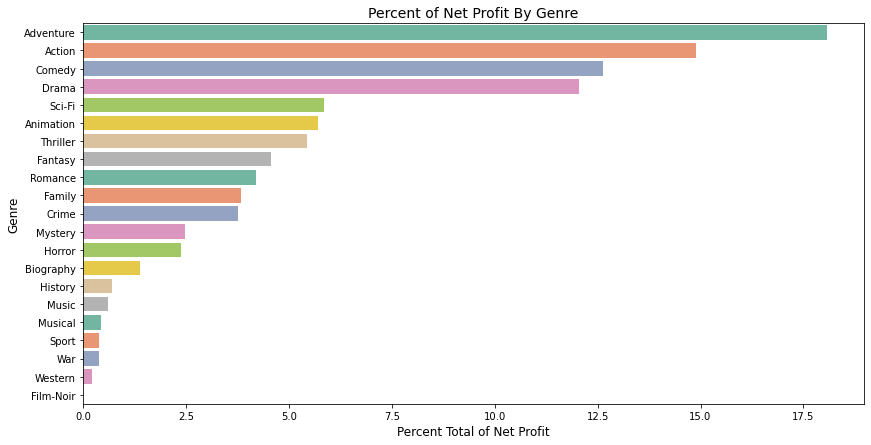

In [34]:
plt.figure(figsize=(14,7))
ax6 = sns.barplot(x=per_by_genre['Percent Total of Net Profit'], y=per_by_genre['Genre'], palette='Set2')
plt.xlabel('Percent Total of Net Profit', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Percent of Net Profit By Genre', fontsize=14)
plt.savefig('PercentProfitGenre');

# Question 3: What is the best time of the year to release a movie?

In [35]:
imdb_budgets_df['Release Date'] = pd.to_datetime(imdb_budgets_df['Release Date'])

In [36]:
dateData =  [x.strftime('%B') for x in imdb_budgets_df['Release Date']]
imdb_budgets_df['Month'] = dateData

In [37]:
m_by_month = imdb_budgets_df.groupby(['Month'], as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)
m_by_month

,Month,Movie
2,December,452
10,October,424
9,November,366
11,September,358
1,August,346
6,June,327
5,July,296
7,March,270
8,May,241
0,April,238


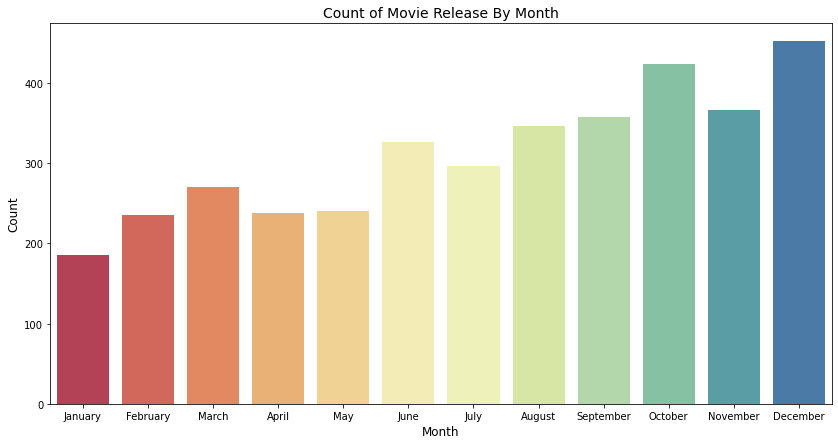

In [38]:
plt.figure(figsize=(14,7))
ax7 = sns.countplot(x=imdb_budgets_df['Month'], palette='Spectral',
                   order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Movie Release By Month', fontsize=14)
plt.savefig('CountbyMonth');

In [39]:
p_by_month = imdb_budgets_df.groupby('Month', as_index=False)[['Adjusted_Profit', 'Profit_Margin']].median().sort_values(by='Adjusted_Profit', ascending=False)
p_by_month

,Month,Adjusted_Profit,Profit_Margin
6,June,8.032764e+07,0.642956
8,May,7.937216e+07,0.638093
5,July,7.471662e+07,0.644061
2,December,5.682309e+07,0.587273
9,November,4.747665e+07,0.571790
3,February,4.108945e+07,0.563982
7,March,3.364581e+07,0.514524
0,April,3.143564e+07,0.541053
4,January,3.113234e+07,0.555721
1,August,2.538331e+07,0.522294


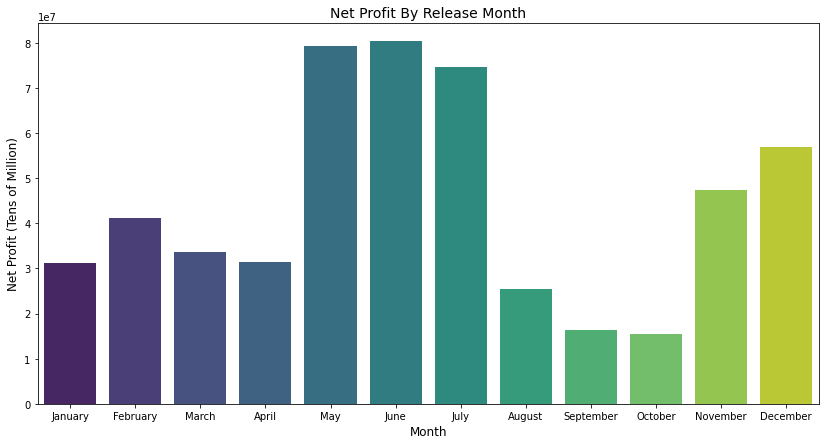

In [40]:
plt.figure(figsize=(14,7))
ax8 = sns.barplot(x=p_by_month['Month'], y=p_by_month['Adjusted_Profit'], palette='viridis', 
                  order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Profit (Tens of Million)', fontsize=12)
plt.title('Net Profit By Release Month', fontsize=14)
plt.savefig('ProfitbyMonth');

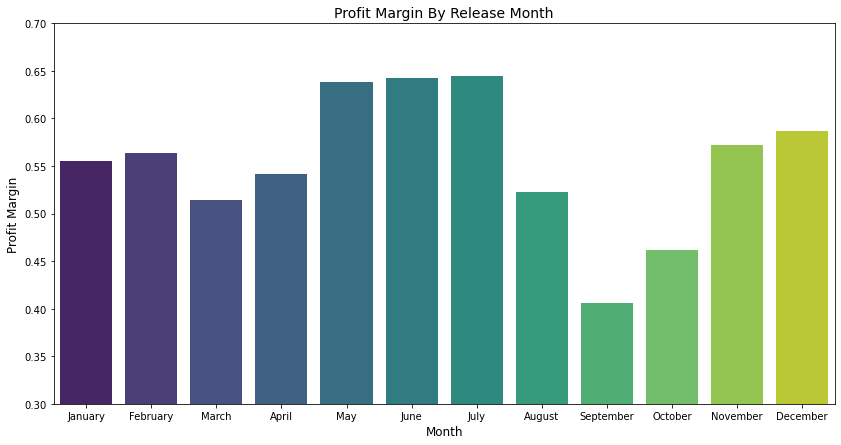

In [41]:
plt.figure(figsize=(14,7))
ax9 = sns.barplot(x=p_by_month['Month'], y=p_by_month['Profit_Margin'], palette='viridis', 
                  order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Profit Margin By Release Month', fontsize=14)
plt.ylim(0.3, 0.7)
plt.savefig('MarginByMonth')

In [42]:
genre_budgets_df['Release Date'] = pd.to_datetime(genre_budgets_df['Release Date'])
genreDate =  [x.strftime('%B') for x in genre_budgets_df['Release Date']]
genre_budgets_df['Month'] = genreDate

In [43]:
month_genre = genre_budgets_df[['Genre', 'Month', 'Adjusted_Profit', 'Release Date']]
month_genre = month_genre.groupby(['Genre', 'Month'], as_index=False)['Adjusted_Profit'].mean().sort_values(by='Adjusted_Profit', ascending=False)

In [44]:
Adventure_df = month_genre.loc[month_genre['Genre'].str.contains('Adventure')]
Action_df = month_genre.loc[month_genre['Genre'].str.contains('Action')]
Comedy_df = month_genre.loc[month_genre['Genre'].str.contains('Comedy')]
Drama_df = month_genre.loc[month_genre['Genre'].str.contains('Drama')]
Scifi_df = month_genre.loc[month_genre['Genre'].str.contains('Sci-Fi')]
Animation_df = month_genre.loc[month_genre['Genre'].str.contains('Animation')]

In [45]:
genre_concat = [Adventure_df, Action_df, Comedy_df, Drama_df, Scifi_df, Animation_df]
month_genre_df = pd.concat(genre_concat)

In [46]:
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_genre_pivoted = month_genre_df.pivot(index='Month', columns='Genre', values='Adjusted_Profit').reindex(months_in_order)

In [47]:
month_genre_pivoted

Genre,Action,Adventure,Animation,Comedy,Drama,Sci-Fi
Month,,,,,,
January,6.791123e+07,1.014803e+08,2.543046e+08,7.032172e+07,4.353902e+07,8.613114e+07
February,1.077412e+08,1.491730e+08,2.736999e+08,7.812990e+07,6.380754e+07,1.234631e+08
March,1.275490e+08,2.004747e+08,2.402952e+08,8.141113e+07,5.234813e+07,1.713357e+08
April,2.593924e+08,3.714263e+08,1.355146e+08,5.005051e+07,7.719929e+07,4.009927e+08
May,3.004318e+08,3.769460e+08,5.874762e+08,1.878399e+08,9.659074e+07,3.818387e+08
June,2.651015e+08,3.929636e+08,5.877637e+08,1.754166e+08,1.123821e+08,3.668735e+08
July,2.572935e+08,2.808123e+08,3.251843e+08,1.409271e+08,1.191990e+08,2.625137e+08
August,7.899352e+07,8.112804e+07,1.081159e+08,5.270262e+07,6.563711e+07,8.081201e+07
September,5.298018e+07,9.338847e+07,1.538475e+08,5.328869e+07,4.019450e+07,1.108048e+08


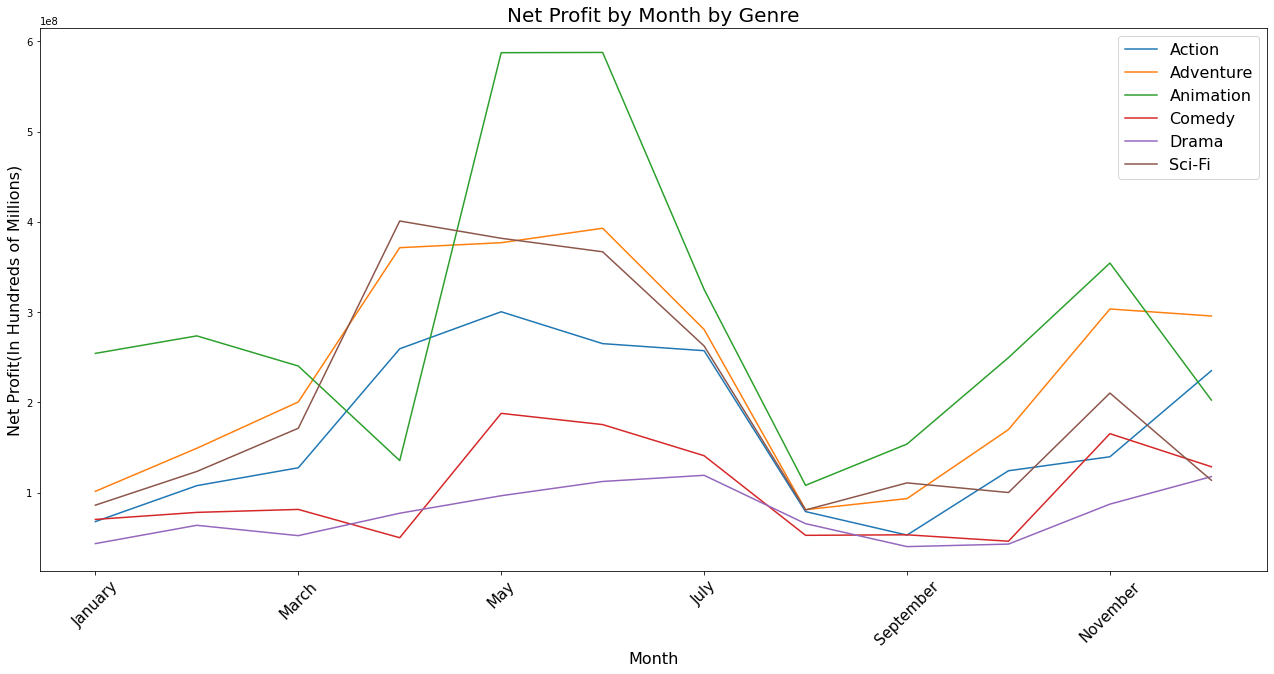

In [48]:
ax10 = month_genre_pivoted.plot(kind='line', figsize=(22, 10), rot=0)
plt.legend(prop={'size': 16})
plt.xlabel('Month', fontsize=16)
plt.ylabel('Net Profit(In Hundreds of Millions)', fontsize=16)
plt.title('Net Profit by Month by Genre', fontsize=20)
plt.xticks(fontsize=15, rotation=45)
plt.savefig('ProfitbyMonthbyGenre');

 # Question 4: Now that we've got a better understanding of what attributes to a successful movie, which actors and directors tend to add the most value?

In [49]:
actors_df['Production Budget'] = (((2020-actors_df['Year'])*.0322)+1)*actors_df['Production Budget']
actors_df['Worldwide Gross'] = (((2020-actors_df['Year'])*.0322)+1)*actors_df['Worldwide Gross']
actors_df['Domestic Gross'] = (((2020-actors_df['Year'])*.0322)+1)*actors_df['Domestic Gross']

actors_df['Net Profit'] = actors_df['Worldwide Gross'] - actors_df['Production Budget']
actors_df['Profit Margin'] = actors_df['Net Profit'] / actors_df['Worldwide Gross']

actor_counts = actors_df['value'].value_counts()
actor_list = actor_counts[actor_counts >= 10].index.tolist()
actors_df = actors_df[actors_df['value'].isin(actor_list)]

actor_total = actors_df.groupby(['value'],  as_index=False)['Net Profit'].mean().sort_values(by='Net Profit', ascending=False)
actor_total['VAR'] = (actor_total['Net Profit']/actor_total['Net Profit'].mean())

In [50]:
top_actors = actor_total.head(25)
top_actors

,value,Net Profit,VAR
113,Ian McKellen,6.426411e+08,4.562969
88,Emma Watson,5.940703e+08,4.218100
48,Chris Hemsworth,5.509931e+08,3.912237
47,Chris Evans,5.183979e+08,3.680800
262,Robert Downey Jr.,4.848850e+08,3.442847
82,Elijah Wood,4.684149e+08,3.325904
227,Mike Myers,4.516160e+08,3.206626
324,Zoe Saldana,4.184140e+08,2.970881
205,Mark Ruffalo,4.180517e+08,2.968308
166,Josh Hutcherson,3.899468e+08,2.768754


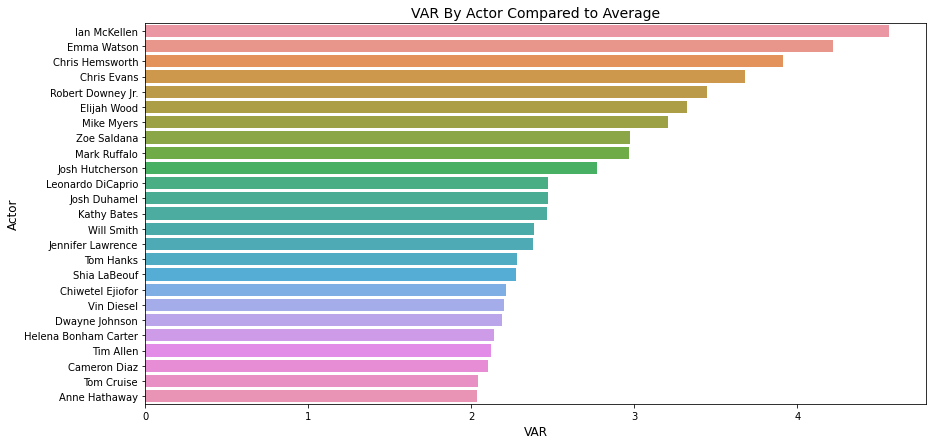

In [51]:
plt.figure(figsize=(14,7))
ax11 = sns.barplot(x=top_actors['VAR'], y=top_actors['value'])
plt.xlabel('VAR', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.title('VAR By Actor Compared to Average', fontsize=14)
plt.savefig('VARActor');

In [52]:
directors_df['Production Budget'] = (((2020-directors_df['Year'])*.0322)+1)*directors_df['Production Budget']
directors_df['Worldwide Gross'] = (((2020-directors_df['Year'])*.0322)+1)*directors_df['Worldwide Gross']
directors_df['Domestic Gross'] = (((2020-directors_df['Year'])*.0322)+1)*directors_df['Domestic Gross']

directors_df['Net Profit'] = directors_df['Worldwide Gross'] - directors_df['Production Budget']
directors_df['Profit Margin'] = directors_df['Net Profit'] / directors_df['Worldwide Gross']

director_counts = directors_df['value'].value_counts()
director_list = director_counts[director_counts >= 5].index.tolist()
directors_df = directors_df[directors_df['value'].isin(director_list)]

director_total = directors_df.groupby(['value'],  as_index=False)['Net Profit'].mean().sort_values(by='Net Profit', ascending=False)
director_total['VAR'] = (director_total['Net Profit']/actor_total['Net Profit'].mean())

top_directors = director_total.head(25)
top_directors

,value,Net Profit,VAR
78,James Cameron,1.244750e+09,8.838147
11,Anthony Russo,1.017389e+09,7.223809
89,Joe Russo,1.017389e+09,7.223809
115,Lee Unkrich,9.120679e+08,6.475990
148,Peter Jackson,8.218780e+08,5.835612
50,David Yates,6.881352e+08,4.885993
104,Jon Favreau,6.287041e+08,4.464012
129,Michael Bay,5.888046e+08,4.180712
96,John Lasseter,5.772545e+08,4.098702
31,Christopher Nolan,5.765089e+08,4.093408


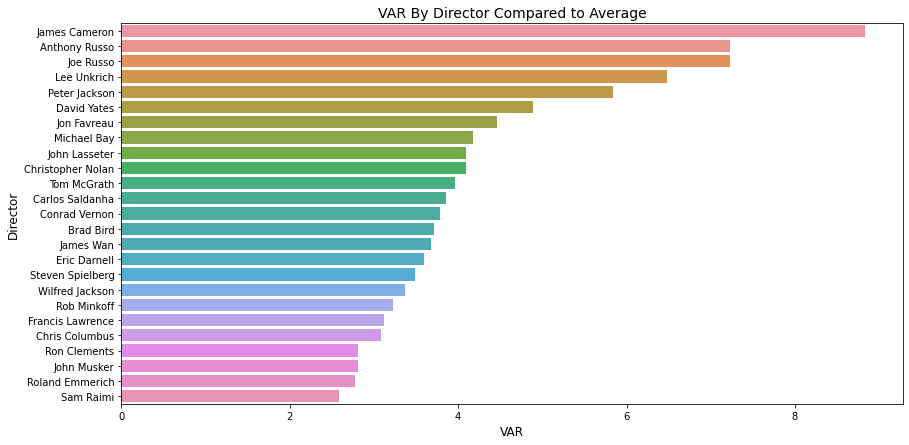

In [53]:
plt.figure(figsize=(14,7))
ax12 = sns.barplot(x=top_directors['VAR'], y=top_directors['value'])
plt.xlabel('VAR', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.title('VAR By Director Compared to Average', fontsize=14)
plt.savefig('VARDirector');

# Question 5: How much should you spend on a movie to win an Oscar?

In [54]:
imdb_budgets_df.set_index(['Movie','Year'], inplace=True)
awards_df.set_index(['film_name', 'film_year'], inplace=True)

In [55]:
budgets_and_awards = imdb_budgets_df.join(awards_df, how='inner', on=['Movie', 'Year'])
budgets_and_awards.head()

,,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month,awards_won,awards_nominated,win_rate
Movie,Year,,,,,,,,,,,,,,,,
Avatar,2009,7.8,PG-13,162,"[Action, Adventure, Fantasy]",2009-12-17,237000000,760507625,2788701337,2551701337,0.915014,320945400.0,3.455514e+09,December,3,9,0.333
Black Panther,2018,7.3,PG-13,134,"[Action, Adventure, Sci-Fi]",2018-02-13,200000000,700059566,1346103376,1146103376,0.851423,212880000.0,1.219912e+09,February,3,7,0.429
Titanic,1997,7.8,PG-13,194,"[Drama, Romance]",1997-12-18,200000000,659363944,2208208395,2008208395,0.909429,348120000.0,3.495488e+09,December,11,14,0.786
The Dark Knight,2008,9.0,PG-13,152,"[Action, Crime, Drama]",2008-07-11,185000000,533720947,1000742751,815742751,0.815137,256484000.0,1.130946e+09,July,2,8,0.250
Toy Story 4,2019,7.8,G,100,"[Animation, Adventure, Comedy]",2019-06-20,200000000,434038008,1073394813,873394813,0.813675,206440000.0,9.015181e+08,June,1,2,0.500


In [56]:
nominated_movies_df = budgets_and_awards.loc[budgets_and_awards['Profit'] > 0]

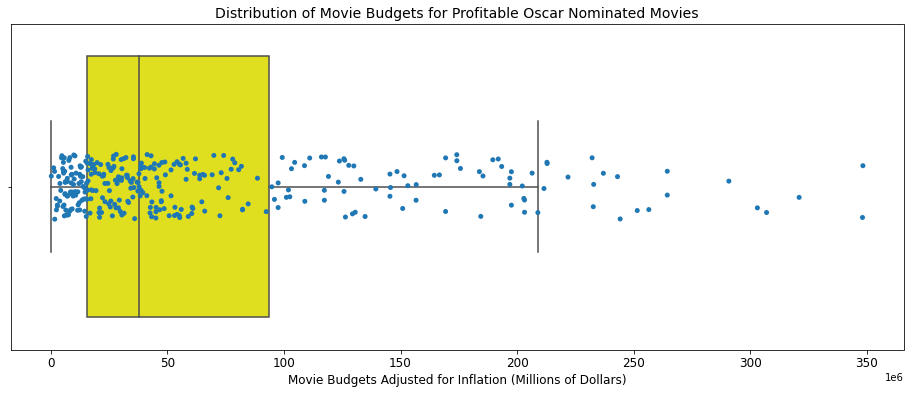

In [57]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Adjusted_Budget', data=nominated_movies_df, showfliers=False, color='yellow')
sns.stripplot(x='Adjusted_Budget', data=nominated_movies_df)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.xticks(fontsize=12)
plt.xlabel('Movie Budgets Adjusted for Inflation (Millions of Dollars)', fontsize=12);
plt.title('Distribution of Movie Budgets for Profitable Oscar Nominated Movies', fontsize=14)
plt.savefig('Oscar_Nominated');

In [58]:
nominated_movies_df['Adjusted_Budget'].describe()

count    3.310000e+02
mean     6.647934e+07
std      7.249719e+07
min      2.127900e+05
25%      1.542566e+07
50%      3.781650e+07
75%      9.359800e+07
max      3.483000e+08
Name: Adjusted_Budget, dtype: float64

In [59]:
nominated_movies_df['win_rate'].describe()

count    330.000000
mean       0.448203
std        0.279846
min        0.000000
25%        0.250000
50%        0.392500
75%        0.600000
max        1.000000
Name: win_rate, dtype: float64

263


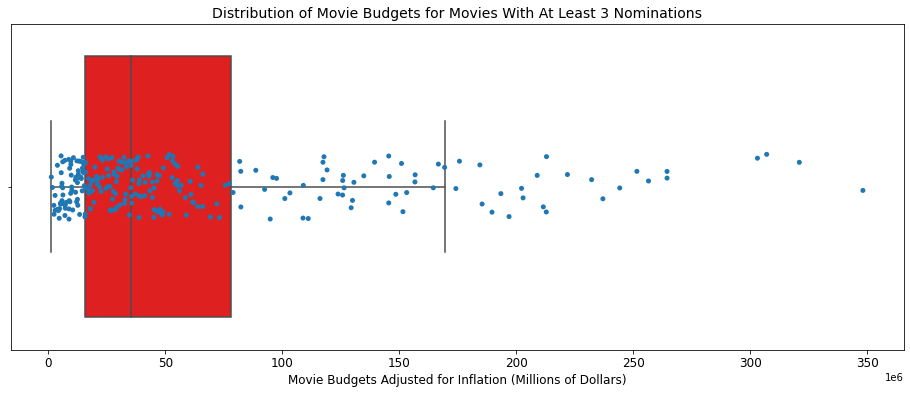

In [60]:
nominated_over_three = nominated_movies_df.loc[nominated_movies_df['awards_nominated'] >= 3]
print(len(nominated_over_three))
plt.figure(figsize=(16,6))
sns.boxplot(x=nominated_over_three['Adjusted_Budget'], showfliers=False, color='red')
sns.stripplot(x='Adjusted_Budget', data=nominated_over_three)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.xticks(fontsize=12)
plt.xlabel('Movie Budgets Adjusted for Inflation (Millions of Dollars)', fontsize=12)
plt.title('Distribution of Movie Budgets for Movies With At Least 3 Nominations', fontsize=14)
plt.savefig('3_Nominations');

In [61]:
nominated_over_three['Adjusted_Budget'].describe()

count    2.630000e+02
mean     6.240465e+07
std      6.912684e+07
min      1.224990e+06
25%      1.548290e+07
50%      3.546500e+07
75%      7.813200e+07
max      3.481200e+08
Name: Adjusted_Budget, dtype: float64

# Question 6: What impact, if any, does runtime and movie rating have on Net Profit, Profit Margin and IMDb rating?

In [62]:
rating_counts = imdb_budgets_df['Rating'].value_counts()
rating_list = rating_counts[rating_counts >= 50].index.tolist()
rating_df = imdb_budgets_df[imdb_budgets_df['Rating'].isin(rating_list)]

In [63]:
rating_df = rating_df.reset_index()
rating_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month
0,Avengers: Endgame,2019,8.4,PG-13,181,"[Action, Adventure, Drama]",2019-04-23,400000000,858373000,2797800564,2397800564,0.857031,412880000.0,2.475010e+09,April
1,Avatar,2009,7.8,PG-13,162,"[Action, Adventure, Fantasy]",2009-12-17,237000000,760507625,2788701337,2551701337,0.915014,320945400.0,3.455514e+09,December
2,Black Panther,2018,7.3,PG-13,134,"[Action, Adventure, Sci-Fi]",2018-02-13,200000000,700059566,1346103376,1146103376,0.851423,212880000.0,1.219912e+09,February
3,Avengers: Infinity War,2018,8.4,PG-13,149,"[Action, Adventure, Sci-Fi]",2018-04-25,300000000,678815482,2048359754,1748359754,0.853541,319320000.0,1.860954e+09,April
4,Titanic,1997,7.8,PG-13,194,"[Drama, Romance]",1997-12-18,200000000,659363944,2208208395,2008208395,0.909429,348120000.0,3.495488e+09,December


In [64]:
rating_count = rating_df.groupby(['Rating'], as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)
rating_count

,Rating,Movie
3,R,1631
2,PG-13,1339
1,PG,590
0,G,93


In [65]:
rating_df2 = rating_df.groupby(['Rating'], as_index=False)[['Adjusted_Profit', 'Profit_Margin', 'IMDb']].median().sort_values(by='Adjusted_Profit', ascending=False)
rating_df2

,Rating,Adjusted_Profit,Profit_Margin,IMDb
0,G,1.543768e+08,0.760594,7.1
1,PG,7.540419e+07,0.617626,6.5
2,PG-13,4.956577e+07,0.546660,6.3
3,R,2.040247e+07,0.505431,6.6


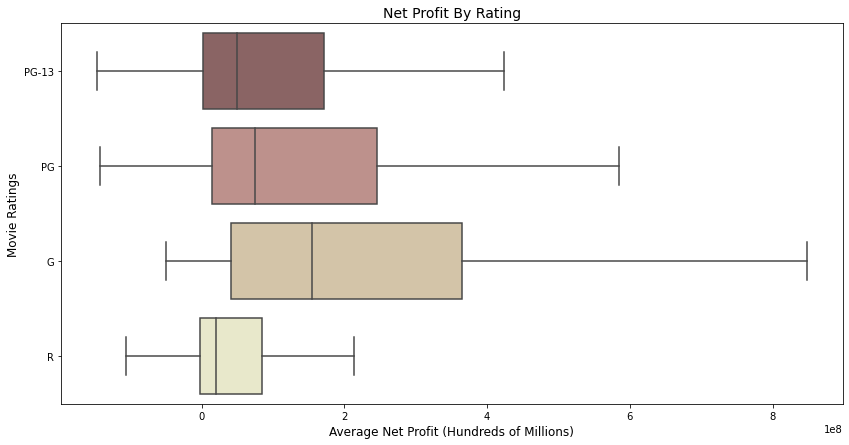

In [66]:
plt.figure(figsize=(14,7))
ax13 = sns.boxplot( y=rating_df["Rating"], x=rating_df["Adjusted_Profit"], showfliers=False, palette='pink')
plt.xlabel('Average Net Profit (Hundreds of Millions)', fontsize=12)
plt.ylabel('Movie Ratings', fontsize=12)
plt.title('Net Profit By Rating', fontsize=14)
plt.savefig('ProfitbyRating');

In [67]:
genre_rating_df = genre_budgets_df.drop(['Rating'], axis=1)
rating_df = rating_df.drop(['Genre'], axis=1)

In [68]:
genre_rating_df = pd.merge(genre_rating_df, rating_df)

In [69]:
Adv_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Adventure')]
Act_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Action')]
Com_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Comedy')]
Dra_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Drama')]
Sci_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Sci-Fi')]
Ani_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Animation')]

genre_concat = [Adv_df, Act_df, Com_df, Dra_df, Sci_df, Ani_df]
genre_rating = pd.concat(genre_concat)

In [70]:
gr_df = genre_rating.groupby(['Genre', 'Rating'],  as_index=False)['Adjusted_Profit'].sum().sort_values(by='Adjusted_Profit', ascending=False)
gr_pivoted = gr_df.pivot(index='Genre', columns='Rating', values='Adjusted_Profit')

In [71]:
gr_pivoted

Rating,G,PG,PG-13,R
Genre,,,,
Action,4.767140e+08,2.480650e+10,1.184765e+11,3.452782e+10
Adventure,1.749756e+10,7.465683e+10,1.141805e+11,1.066331e+10
Animation,2.045177e+10,4.679251e+10,6.826376e+08,1.203686e+08
Comedy,1.498990e+10,6.173386e+10,4.472262e+10,3.009565e+10
Drama,6.452247e+09,1.978580e+10,6.469567e+10,5.055767e+10
Sci-Fi,5.751998e+08,4.693468e+09,5.404536e+10,1.107281e+10


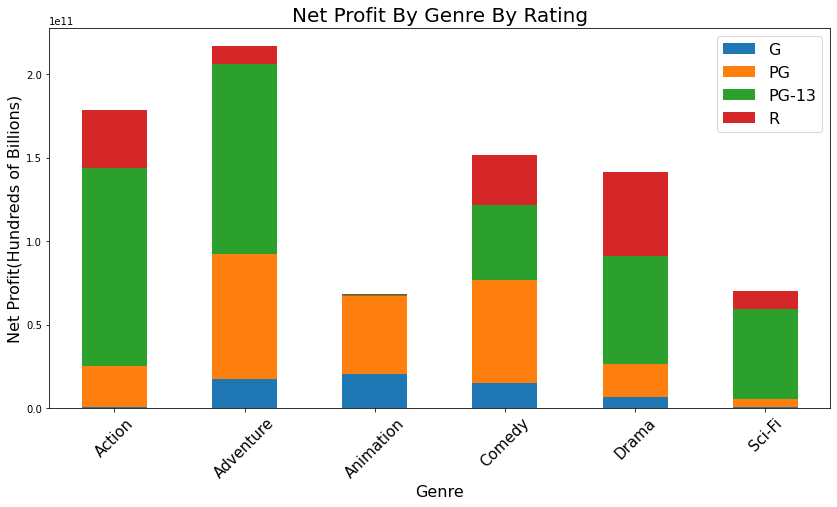

In [72]:
ax14 = gr_pivoted.plot(kind='bar', stacked=True, figsize=(14,7))
plt.legend(prop={'size': 16})
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Net Profit(Hundreds of Billions)', fontsize=16)
plt.title('Net Profit By Genre By Rating', fontsize=20)
plt.xticks(fontsize=15, rotation=45)
plt.savefig('ProfitbyGenrebyRating');

In [73]:
runtime_df = imdb_budgets_df[['Runtime', 'Adjusted_Profit', 'Profit_Margin']]
runtime_df

,,Runtime,Adjusted_Profit,Profit_Margin
Movie,Year,,,
Avengers: Endgame,2019,181,2.475010e+09,0.857031
Avatar,2009,162,3.455514e+09,0.915014
Black Panther,2018,134,1.219912e+09,0.851423
Avengers: Infinity War,2018,149,1.860954e+09,0.853541
Titanic,1997,194,3.495488e+09,0.909429
...,...,...,...,...
The Misfits,1961,125,1.217916e+07,0.512195
Judgment at Nuremberg,1961,179,2.029860e+07,0.700000
The Wrong Man,1956,105,2.448640e+06,0.400000


In [74]:
pearsoncorr = runtime_df.corr(method='pearson')
pearsoncorr

,Runtime,Adjusted_Profit,Profit_Margin
Runtime,1.000000,0.223064,0.051121
Adjusted_Profit,0.223064,1.000000,0.051121
Profit_Margin,0.051121,0.051121,1.000000


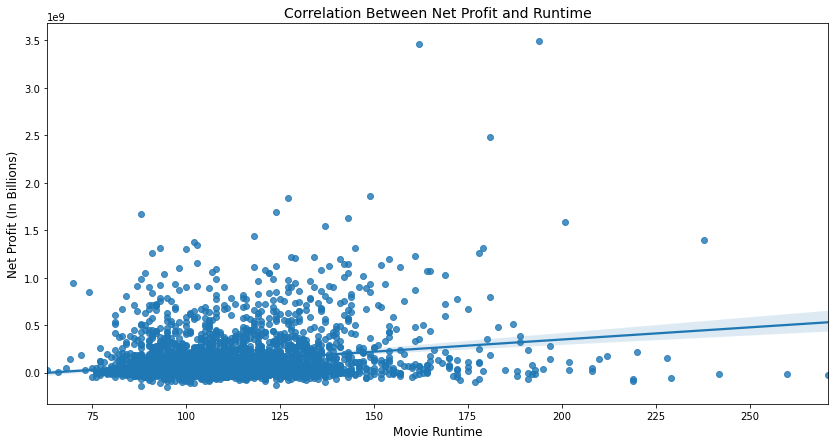

In [75]:
plt.figure(figsize=(14,7))
ax15 = sns.regplot(x='Runtime', y='Adjusted_Profit', data=imdb_budgets_df)
plt.xlabel('Movie Runtime', fontsize=12)
plt.ylabel('Net Profit (In Billions)', fontsize=12)
plt.title('Correlation Between Net Profit and Runtime', fontsize=14)
plt.savefig('CorrProfitRuntime');

# Question 7: Sticking to our analysis of Net Profit and Profit Margin, what should Microsoft determine to be the baseline for sustainable success?

In [76]:
studiobudgets_df = pd.merge(studio_df, imdb_budgets_df, left_on = 'title', right_on='Movie') 
studiobudgets_df.head()

,title,studio,domestic_gross,foreign_gross,year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month
0,Toy Story 3,Buena Vista,415000000.0,652000000,2010,8.3,G,103,"[Animation, Adventure, Comedy]",2010-06-18,200000000,415004880,1068879522,868879522,0.812888,264400000.0,1.148659e+09,June
1,Inception,WB,292600000.0,535700000,2010,8.8,PG-13,148,"[Action, Adventure, Sci-Fi]",2010-07-16,160000000,292576195,832551961,672551961,0.807820,211520000.0,8.891137e+08,July
2,Shrek Forever After,Pixar/Dreamworks,238700000.0,513900000,2010,6.3,PG,93,"[Animation, Adventure, Comedy]",2010-05-21,165000000,238736787,756244673,591244673,0.781817,218130000.0,7.816255e+08,May
3,The Twilight Saga: Eclipse,Sumbadhat Productions,300500000.0,398000000,2010,5.0,PG-13,124,"[Adventure, Drama, Fantasy]",2010-06-30,68000000,300531751,706102828,638102828,0.903697,89896000.0,8.435719e+08,June
4,Iron Man 2,Paramount,312400000.0,311500000,2010,7.0,PG-13,124,"[Action, Adventure, Sci-Fi]",2010-05-07,170000000,312433331,621156389,451156389,0.726317,224740000.0,5.964287e+08,May


In [77]:
studiobudgets_df.drop(columns = {'title', 'domestic_gross', 'Domestic Gross', 'foreign_gross', 'year', 'Production Budget', 'Worldwide Gross', 'Profit'}, inplace = True)
studiobudgets_df.rename(columns = {'studio':'Studio','Worldwide Gross ':'Worldwide Gross' }, inplace = True) 
studiobudgets_df.head()

,Studio,IMDb,Rating,Runtime,Genre,Release Date,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month
0,Buena Vista,8.3,G,103,"[Animation, Adventure, Comedy]",2010-06-18,0.812888,264400000.0,1.148659e+09,June
1,WB,8.8,PG-13,148,"[Action, Adventure, Sci-Fi]",2010-07-16,0.807820,211520000.0,8.891137e+08,July
2,Pixar/Dreamworks,6.3,PG,93,"[Animation, Adventure, Comedy]",2010-05-21,0.781817,218130000.0,7.816255e+08,May
3,Sumbadhat Productions,5.0,PG-13,124,"[Adventure, Drama, Fantasy]",2010-06-30,0.903697,89896000.0,8.435719e+08,June
4,Paramount,7.0,PG-13,124,"[Action, Adventure, Sci-Fi]",2010-05-07,0.726317,224740000.0,5.964287e+08,May


In [78]:
profit_by_studiodf = studiobudgets_df.groupby('Studio').median()
profit_by_studiodf = profit_by_studiodf.reset_index()                                        
profit_by_studiodf = profit_by_studiodf.nlargest(25, 'Adjusted_Profit')
profit_by_studiodf

,Studio,IMDb,Runtime,Profit_Margin,Adjusted_Budget,Adjusted_Profit
51,UTV,8.45,141.5,0.958798,33747300.0,6.921112e+08
37,Pixar/Dreamworks,6.70,94.0,0.716170,182352000.0,4.921191e+08
9,Buena Vista,7.10,117.0,0.667056,176565000.0,1.928538e+08
28,MBox,7.80,158.0,0.624019,116082000.0,1.926625e+08
48,Strand,6.50,112.0,0.741792,50796000.0,1.459292e+08
45,Sony,6.30,105.0,0.658692,65796000.0,1.296401e+08
35,Paramount,6.40,110.0,0.639187,53053600.0,1.270562e+08
20,Fox,6.35,106.0,0.644465,65785200.0,1.171804e+08
52,Universal,6.20,108.0,0.686945,47728000.0,1.081619e+08
54,WB,6.60,113.5,0.542261,66914000.0,8.010906e+07


In [79]:
profit_by_studiodf.describe()

,IMDb,Runtime,Profit_Margin,Adjusted_Budget,Adjusted_Profit
count,25.00000,25.000000,25.000000,2.500000e+01,2.500000e+01
mean,6.76600,112.180000,0.663049,4.883893e+07,1.134278e+08
std,0.64108,16.751169,0.122761,4.612474e+07,1.557719e+08
min,5.80000,94.000000,0.446140,2.822000e+06,1.587142e+07
25%,6.35000,103.500000,0.600112,2.192660e+07,3.370892e+07
50%,6.60000,108.000000,0.658692,3.305360e+07,5.004866e+07
75%,7.10000,112.000000,0.716170,5.305360e+07,1.270562e+08
max,8.45000,160.000000,0.958798,1.823520e+08,6.921112e+08


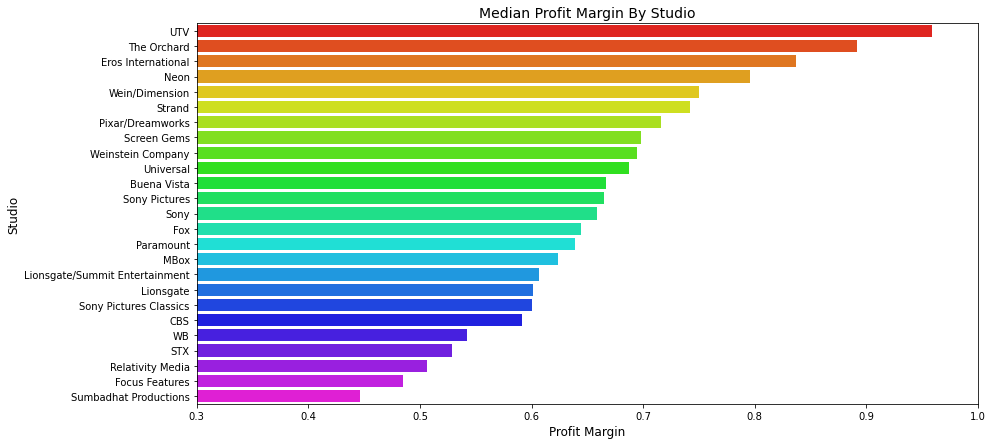

In [80]:
plt.figure(figsize=(14,7))
ax16 = sns.barplot(x=profit_by_studiodf['Profit_Margin'], y=profit_by_studiodf['Studio'],
                   order=profit_by_studiodf.sort_values('Profit_Margin', ascending=False).Studio, palette='gist_rainbow')
plt.xlabel('Profit Margin', fontsize=12)
plt.ylabel('Studio', fontsize=12)
plt.title('Median Profit Margin By Studio', fontsize=14)
plt.xlim(0.3, 1.0)
plt.savefig('ProfitMarginStudio')

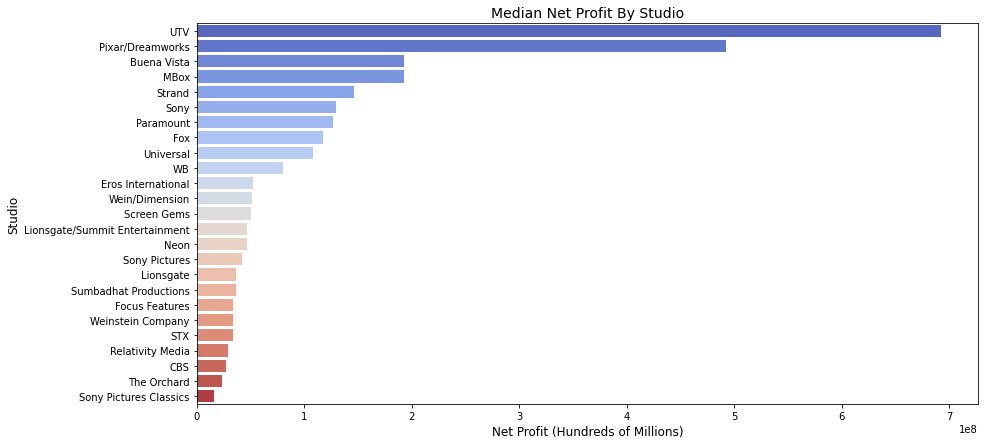

In [81]:
plt.figure(figsize=(14,7))
ax16 = sns.barplot(y=profit_by_studiodf['Studio'], x=profit_by_studiodf['Adjusted_Profit'], palette='coolwarm')
plt.xlabel('Net Profit (Hundreds of Millions)', fontsize=12)
plt.ylabel('Studio', fontsize=12)
plt.title('Median Net Profit By Studio', fontsize=14)
plt.savefig('NetProfitStudio');

 # Question 8: Based on the success of current competitors, which should we look to for best practices?

In [82]:
theaters_df['dollars_per_theater'] = theaters_df['total_dom_gross($)'] / theaters_df['max_theaters']
theaters_df.head()

,title,max_theaters,year,total_dom_gross($),studio,dollars_per_theater
0,The Lion King,4802,2019,543638043,Disney,113210.754477
1,Avengers: Endgame,4662,2019,858373000,Disney,184121.192621
2,Spider-Man: Far from Home,4634,2019,390532085,Sony,84275.374407
3,Toy Story 4,4575,2019,434038008,Disney,94871.695738
4,It Chapter Two,4570,2019,211593228,Warner Bros.,46300.487527


In [83]:
average_theaters = theaters_df.groupby('studio').mean()
average_theaters_ranked = average_theaters.sort_values(by=['studio'],ascending=False)
average_theaters_ranked.reset_index(inplace=True)
average_theaters

,max_theaters,year,total_dom_gross($),dollars_per_theater
studio,,,,
Disney,3682.319728,2010.591837,2.026179e+08,51856.141904
DreamWorks Distribution,3408.263158,2002.947368,1.181983e+08,33102.055326
Lionsgate,3356.244898,2014.469388,9.526829e+07,26485.343053
Metro-Goldwyn-Mayer (MGM),3259.142857,2004.000000,7.843758e+07,23829.208308
New Line Cinema,3410.571429,2001.857143,2.497181e+08,72518.242699
Paramount Pictures,3466.705357,2010.714286,1.086149e+08,30508.472763
Sony,3478.355556,2010.562963,1.166779e+08,32626.668858
TriStar Pictures,3146.000000,2014.000000,8.070322e+07,25546.753029
Twentieth Century Fox,3493.975758,2011.212121,1.110098e+08,31119.138124


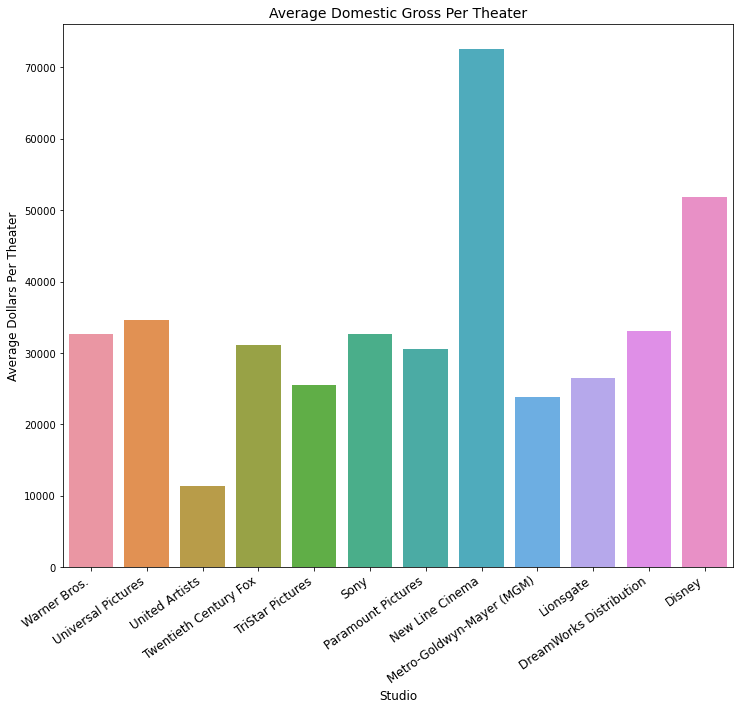

In [84]:
plt.figure(figsize=(12,10))
ax16 = sns.barplot(x='studio', y='dollars_per_theater', data=average_theaters_ranked)
plt.xlabel('Studio', fontsize=12)
plt.title("Average Domestic Gross Per Theater", fontsize=14);
plt.ylabel('Average Dollars Per Theater', fontsize=12);
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.savefig('DomesticPerTheater');

In [85]:
theaters_df['studio'].value_counts()

Warner Bros.                 208
Twentieth Century Fox        165
Disney                       147
Universal Pictures           136
Sony                         135
Paramount Pictures           112
Lionsgate                     49
DreamWorks Distribution       19
Metro-Goldwyn-Mayer (MGM)     14
TriStar Pictures               7
New Line Cinema                7
United Artists                 1
Name: studio, dtype: int64

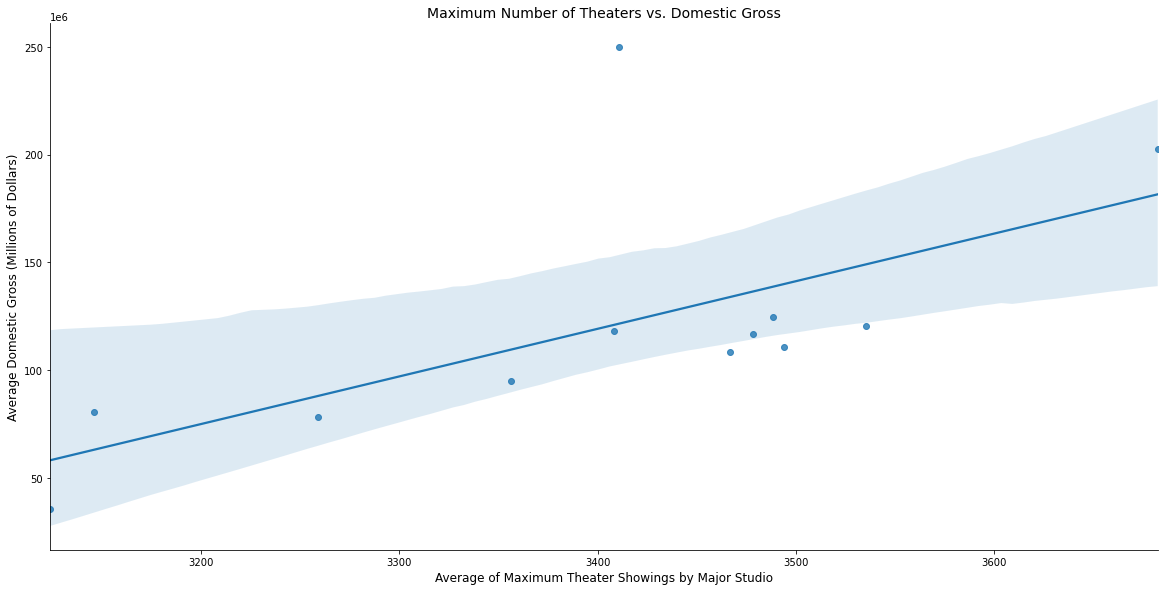

In [86]:
ax17 = sns.lmplot(x='max_theaters', y='total_dom_gross($)', data=average_theaters, height=8, aspect=2)
plt.ticklabel_format(axis='y',style='sci', scilimits=(6,6))
plt.xlabel('Average of Maximum Theater Showings by Major Studio', fontsize=12)
plt.ylabel('Average Domestic Gross (Millions of Dollars)', fontsize=12)
plt.title('Maximum Number of Theaters vs. Domestic Gross', fontsize=14)
plt.savefig('TheatersVGross');

In [87]:
theaters_df.set_index(['title', 'year'], inplace=True)
theaters_and_awards = theaters_df.join(awards_df, how='inner', on=['title', 'year'])
theaters_and_awards.groupby('studio').count()

,max_theaters,total_dom_gross($),dollars_per_theater,awards_won,awards_nominated,win_rate
studio,,,,,,
Disney,22,22,22,22,22,22
DreamWorks Distribution,4,4,4,4,4,4
New Line Cinema,2,2,2,2,2,2
Paramount Pictures,7,7,7,7,7,7
Sony,6,6,6,6,6,6
Twentieth Century Fox,4,4,4,4,4,4
Universal Pictures,6,6,6,6,6,6
Warner Bros.,15,15,15,15,15,15


In [88]:
theaters_and_awards.groupby('studio').mean()

,max_theaters,total_dom_gross($),dollars_per_theater,awards_won,awards_nominated,win_rate
studio,,,,,,
Disney,3818.727273,3.052172e+08,78797.606486,1.363636,3.000000,0.599045
DreamWorks Distribution,3444.250000,1.532236e+08,44447.628709,2.000000,4.250000,0.604250
New Line Cinema,3662.500000,3.584086e+08,97814.750337,6.500000,8.500000,0.666500
Paramount Pictures,3564.857143,1.408354e+08,38930.819127,1.000000,3.714286,0.451143
Sony,3653.666667,2.378423e+08,64720.228079,1.166667,3.166667,0.538833
Twentieth Century Fox,3501.750000,1.368749e+08,38404.788199,2.250000,6.000000,0.425000
Universal Pictures,3338.833333,1.493447e+08,44970.820343,1.333333,3.333333,0.505500
Warner Bros.,3831.600000,2.340559e+08,60023.038417,2.666667,5.866667,0.557400


In [89]:
data = pd.read_csv('E:\movies new.csv', index_col=0)
data.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


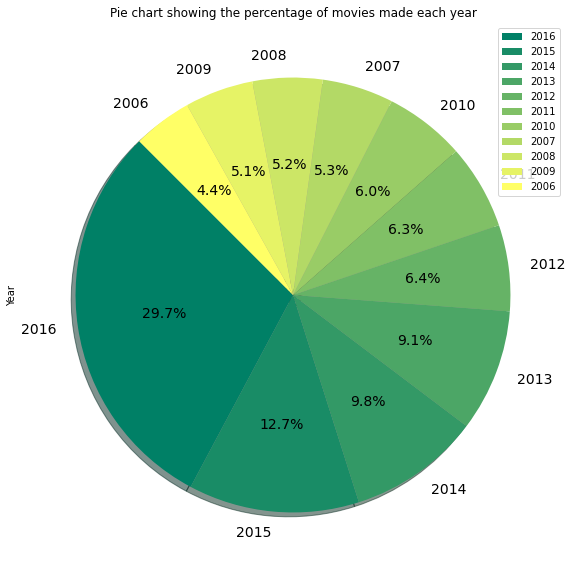

In [90]:
data['Year'].value_counts().plot(kind='pie',fontsize=14, autopct='%3.1f%%',figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')
plt.ylabel('Year')
plt.title('Pie chart showing the percentage of movies made each year')
plt.savefig('Percentage of movies made pie chart')

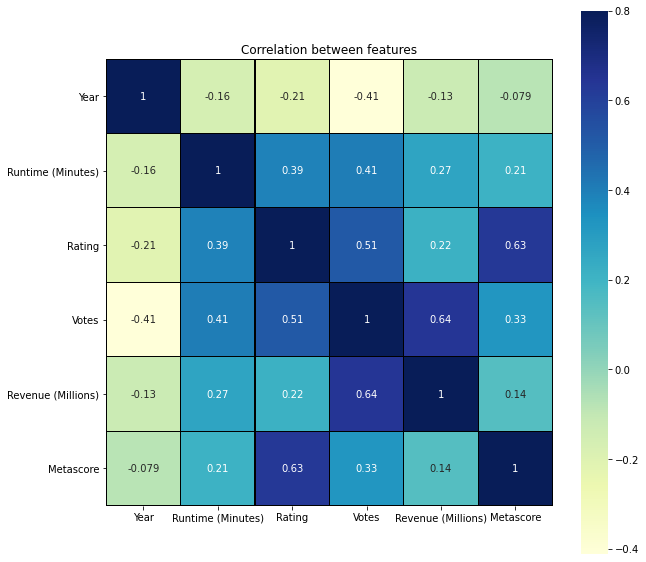

In [91]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')
plt.savefig('Correlation between features')

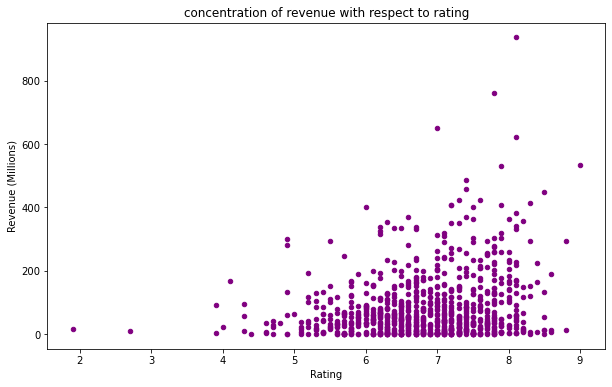

<Figure size 432x288 with 0 Axes>

In [92]:

data.plot(kind='scatter', x='Rating', y='Revenue (Millions)', figsize=(10, 6), color='purple', grid=False)
plt.title('concentration of revenue with respect to rating')
plt.show()
plt.savefig('Revenue as per rating')

C:\Users\Palak Shah\anaconda3\ANA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


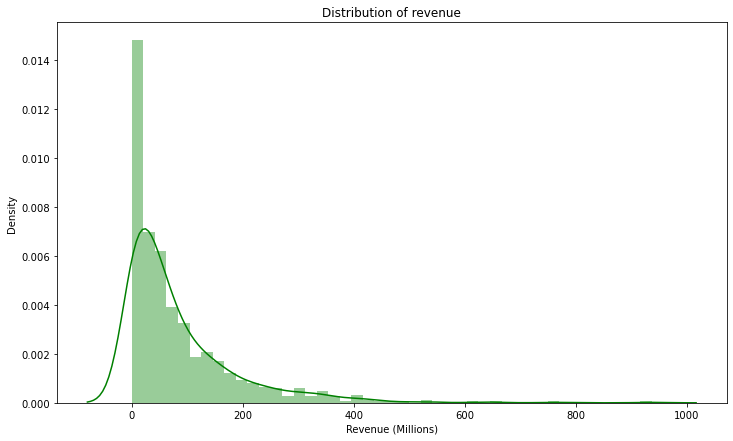

<Figure size 432x288 with 0 Axes>

In [93]:
plt.figure(figsize=(12,7))
sns.distplot(data['Revenue (Millions)'],color ='g')
plt.title('Distribution of revenue')
plt.show()
plt.savefig('Distribution of fig')

In [94]:
# imdb_budgets_df['Production Budget']=imdb_budgets_df['Production Budget'].str.replace(',','')
# imdb_budgets_df['Worldwide Gross']=imdb_budgets_df['Worldwide Gross'].str.replace(',','')
# imdb_budgets_df['Runtime']=imdb_budgets_df['Runtime'].str.replace(',','')
imdb_budgets_df.describe()

,IMDb,Runtime,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
count,3740.000000,3740.000000,3.740000e+03,3.740000e+03,3.740000e+03,3.740000e+03,3740.000000,3.740000e+03,3.740000e+03
mean,6.468663,110.113102,4.088764e+07,5.689821e+07,1.234891e+08,8.260147e+07,-1.748399,5.792379e+07,1.178538e+08
std,0.990712,20.206047,4.501681e+07,7.440015e+07,2.008496e+08,1.710134e+08,28.546491,5.876344e+07,2.318883e+08
min,1.900000,63.000000,7.000000e+03,4.230000e+02,4.230000e+02,-1.104502e+08,-944.626478,1.060640e+04,-1.467527e+08
25%,5.900000,96.000000,1.200000e+07,1.280278e+07,1.836851e+07,4.173795e+05,0.031633,1.727360e+07,5.416518e+05
50%,6.500000,106.500000,2.500000e+07,3.342290e+07,5.382397e+07,2.448173e+07,0.553290,3.838100e+07,3.745480e+07
75%,7.200000,120.000000,5.200000e+07,7.014790e+07,1.413770e+08,9.198064e+07,0.766492,7.898000e+07,1.355356e+08
max,9.300000,271.000000,4.000000e+08,8.583730e+08,2.797801e+09,2.551701e+09,0.997599,4.888342e+08,3.495488e+09


In [95]:
imdb_budgets_df.head()

,,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month
Movie,Year,,,,,,,,,,,,,
Avengers: Endgame,2019,8.4,PG-13,181,"[Action, Adventure, Drama]",2019-04-23,400000000,858373000,2797800564,2397800564,0.857031,412880000.0,2.475010e+09,April
Avatar,2009,7.8,PG-13,162,"[Action, Adventure, Fantasy]",2009-12-17,237000000,760507625,2788701337,2551701337,0.915014,320945400.0,3.455514e+09,December
Black Panther,2018,7.3,PG-13,134,"[Action, Adventure, Sci-Fi]",2018-02-13,200000000,700059566,1346103376,1146103376,0.851423,212880000.0,1.219912e+09,February
Avengers: Infinity War,2018,8.4,PG-13,149,"[Action, Adventure, Sci-Fi]",2018-04-25,300000000,678815482,2048359754,1748359754,0.853541,319320000.0,1.860954e+09,April
Titanic,1997,7.8,PG-13,194,"[Drama, Romance]",1997-12-18,200000000,659363944,2208208395,2008208395,0.909429,348120000.0,3.495488e+09,December


In [101]:
 imdb_budgets_df['Production Budget']=imdb_budgets_df['Production Budget'].astype(float)
 imdb_budgets_df['Worldwide Gross']=imdb_budgets_df['Worldwide Gross'].astype(float)
 imdb_budgets_df['Runtime']=imdb_budgets_df['Runtime'].astype(float)

In [107]:
imdb_budgets_df['Label']= imdb_budgets_df.apply(lambda x:'hit' if(x['IMDb'] > 7) else "flop", axis=1)

In [109]:
imdb_budgets_df.head()

,,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month,Label
Movie,Year,,,,,,,,,,,,,,
Avengers: Endgame,2019,8.4,PG-13,181.0,"[Action, Adventure, Drama]",2019-04-23,400000000.0,858373000,2.797801e+09,2397800564,0.857031,412880000.0,2.475010e+09,April,hit
Avatar,2009,7.8,PG-13,162.0,"[Action, Adventure, Fantasy]",2009-12-17,237000000.0,760507625,2.788701e+09,2551701337,0.915014,320945400.0,3.455514e+09,December,hit
Black Panther,2018,7.3,PG-13,134.0,"[Action, Adventure, Sci-Fi]",2018-02-13,200000000.0,700059566,1.346103e+09,1146103376,0.851423,212880000.0,1.219912e+09,February,hit
Avengers: Infinity War,2018,8.4,PG-13,149.0,"[Action, Adventure, Sci-Fi]",2018-04-25,300000000.0,678815482,2.048360e+09,1748359754,0.853541,319320000.0,1.860954e+09,April,hit
Titanic,1997,7.8,PG-13,194.0,"[Drama, Romance]",1997-12-18,200000000.0,659363944,2.208208e+09,2008208395,0.909429,348120000.0,3.495488e+09,December,hit


In [110]:
imdb_budgets_df_temp = imdb_budgets_df[['Production Budget', 'Worldwide Gross', 'Runtime']]


In [114]:
imdb_budgets_df_temp2 = imdb_budgets_df[['Label']]


In [115]:
imdb_budgets_df_temp.head()

,,Production Budget,Worldwide Gross,Runtime
Movie,Year,,,
Avengers: Endgame,2019,400000000.0,2.797801e+09,181.0
Avatar,2009,237000000.0,2.788701e+09,162.0
Black Panther,2018,200000000.0,1.346103e+09,134.0
Avengers: Infinity War,2018,300000000.0,2.048360e+09,149.0
Titanic,1997,200000000.0,2.208208e+09,194.0


In [116]:
imdb_budgets_df_temp2.head()

,,Label
Movie,Year,
Avengers: Endgame,2019,hit
Avatar,2009,hit
Black Panther,2018,hit
Avengers: Infinity War,2018,hit
Titanic,1997,hit


In [117]:
imdb_budgets_df_temp2.columns

Index(['Label'], dtype='object')

In [118]:
X = imdb_budgets_df_temp.to_numpy()
y = imdb_budgets_df_temp2.to_numpy()

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [120]:

y_train[:10]

array([['hit'],
       ['flop'],
       ['flop'],
       ['flop'],
       ['flop'],
       ['hit'],
       ['flop'],
       ['flop'],
       ['flop'],
       ['hit']], dtype=object)

In [121]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

<ipython-input-121-6affca082033>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50)

In [122]:
y_pred = classifier.predict(X_test)

In [123]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[683  88]
 [201 150]]
Classification Report:
              precision    recall  f1-score   support

        flop       0.77      0.89      0.83       771
         hit       0.63      0.43      0.51       351

    accuracy                           0.74      1122
   macro avg       0.70      0.66      0.67      1122
weighted avg       0.73      0.74      0.73      1122

Accuracy: 0.7424242424242424
